In [18]:
from os import listdir
from os.path import isfile, join
import pyvista as pv
import os
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [19]:
def func(dir_path, output_scalar='m', fill_val=0):
    '''
    draw 2d geographical interpolation
    '''
    onlyfiles = [f for f in listdir(dir_path) if isfile(join(dir_path, f))]
    pvtu_files = [f for f in onlyfiles if f.endswith('.pvtu')]
    # check output directory
    output_dir = os.path.join('./pictures', dir_path[2:])
    if os.path.isdir('./pictures') == False:
        os.makedirs(output_dir)
    elif os.path.isdir(output_dir) == False:
        os.mkdir(output_dir)
    for f in pvtu_files:
        filename = os.path.join(dir_path, f)
        mesh = pv.read(filename)
        grid_x, grid_y = np.mgrid[0:2*np.pi:400j, -np.pi/2:np.pi/2:200j]
        points = np.column_stack((mesh.point_arrays["geo coords"][:, 0], 
                                  mesh.point_arrays["geo coords"][:, 1]))
        values = mesh.point_arrays[output_scalar]
        grid_z = griddata(points, 
                           values, 
                           (grid_x, grid_y), 
                           method='linear', 
                           fill_value=fill_val)
        fig = plt.figure()
        fig.set_size_inches(40,20)
        ax = fig.add_subplot(211)
        im = ax.imshow(grid_z.T,
                   cmap='jet',
                   extent=(0,2*np.pi,-np.pi/2,np.pi/2), 
                   origin='lower')
        ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
        ax.set_xticklabels(['0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2 \pi$'],
                           fontsize=20)
        ax.set_yticks([-np.pi/2, 0, np.pi/2])
        ax.set_yticklabels([r'$-\pi/2$', '0', r'$\pi/2$'],
                           fontsize=20)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        output_f = os.path.join(output_dir, f[:-5]+'.jpg')
        plt.savefig(output_f,bbox_inches='tight', dpi=150)

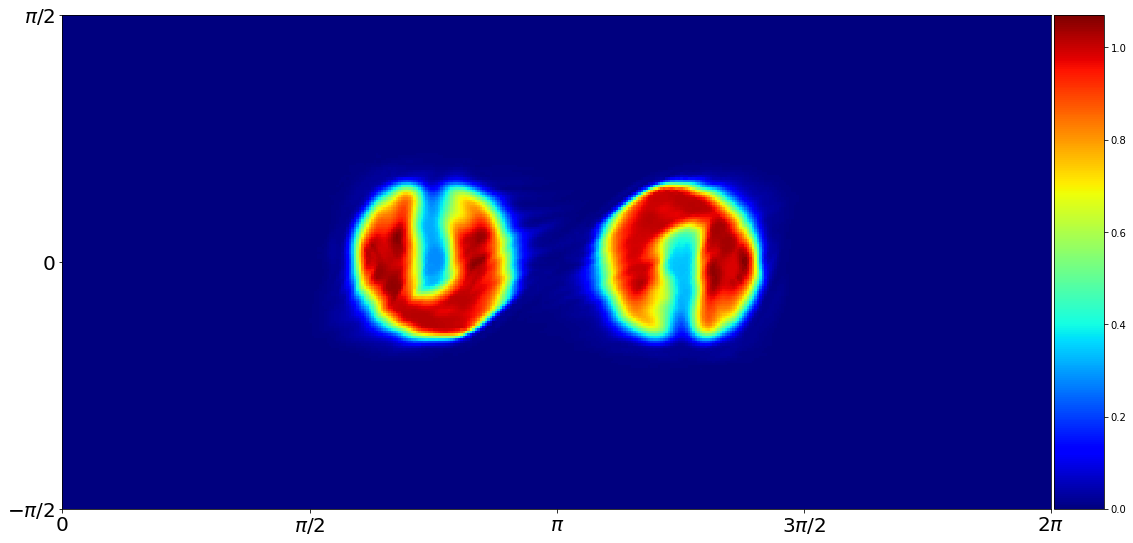

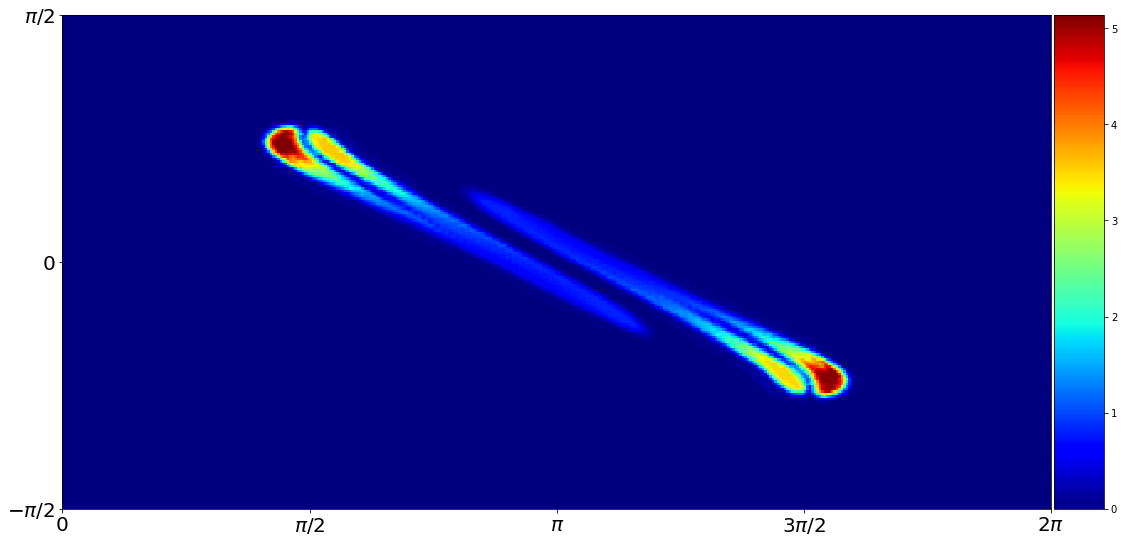

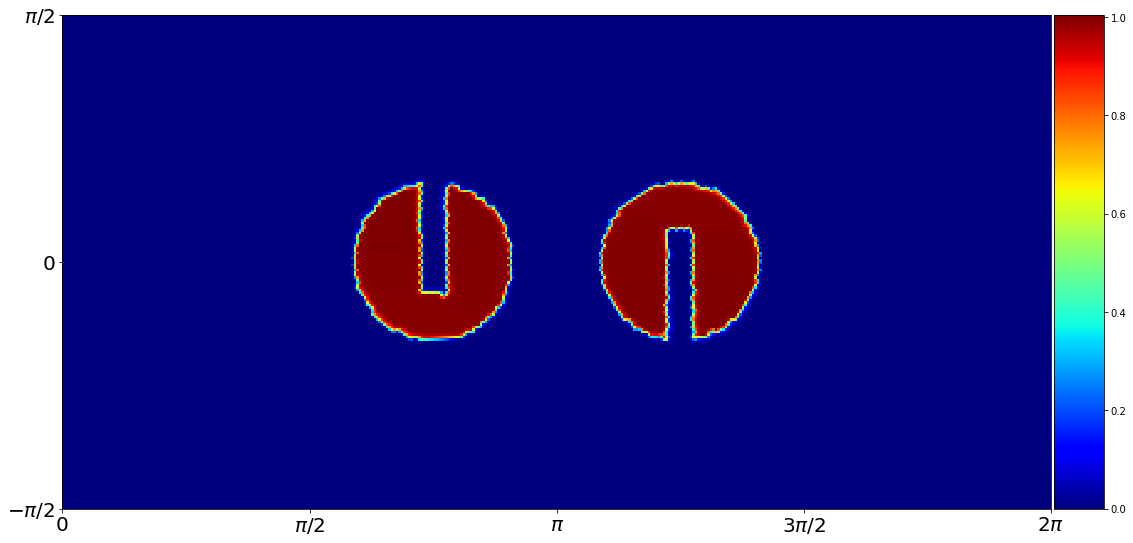

In [20]:
func("./keymoments")

In [ ]:
func("./screenshots")

/home/chuck/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
